# Fundamentals of Machine Learning

## Machine learning classification tasks

Importing modules

In [1]:
import numpy as np #linear algebra
import pandas as pd #dataframes
import sklearn.preprocessing #raw data preprocessing
import sklearn.model_selection #grid search + cross validation
import sklearn.ensemble #random forest
import sklearn.tree #decision trees
import sklearn.linear_model #logistic regression + perceptron
import sklearn.svm #support vector machines
import sklearn.neighbors #k-nearest neighbors
import sklearn.neural_network #multilayer perceptron
import matplotlib.pyplot as plt #visualization
import xgboost as xgb #extreme gradient boosting

Reading the data from a csv file and saving it into a dataframe

In [2]:
data = pd.read_csv('../data/exampleObesityClassReg.csv')

### Data Preprocessing

Data exploration

In [3]:
data.sample(10)

,country_name,continent,prevalence,tertile,RTDs/High-Strength Premixes,Processed Fruit and Vegetables,Processed Meat and Seafood,Ready Meals,"Rice, Pasta and Noodles","Sauces, Dressings and Condiments",...,Baby Food,Drinking Milk Products,Yoghurt and Sour Milk Products,Other Dairy,Ice Cream and Frozen Desserts,Cocoa Powder,Emulsifiers and Co-Emulsifiers,Fats and Oils,Flours,Milk
12,Thailand,Asia,0.087858,1,265.400000,453.366667,950.533333,245.333333,14231.233330,6168.333333,...,1156.166667,10149.900000,4577.433333,4127.766667,647.533333,63.633333,45.866667,8105.400000,3701.60000,13473.666670
25,Greece,Europe,0.172390,1,492.166667,13111.633330,10953.900000,2158.700000,14110.233330,14032.600000,...,2280.200000,52229.566670,12054.866670,19095.566670,4792.433333,327.366667,524.566667,23913.600000,56020.96667,89917.200000
66,Slovenia,Europe,0.263871,3,2454.966667,7337.333333,11419.266670,2031.900000,10990.766670,6365.633333,...,1059.166667,75184.000000,13103.766670,7001.166667,3239.900000,228.366667,353.100000,17559.200000,45317.53333,99504.333330
69,Chile,America,0.289636,3,431.266667,9581.966667,6937.666667,383.466667,17394.666670,6575.500000,...,591.833333,20579.700000,8320.166667,5449.900000,5682.866667,276.866667,483.300000,20101.933330,69019.10000,37038.300000
23,Romania,Europe,0.169666,1,6.766667,3863.433333,10855.233330,153.900000,7172.600000,2262.466667,...,208.100000,9655.166667,6286.533333,2348.000000,1259.933333,72.933333,350.066667,14205.233330,61351.10000,20255.433330
73,United States of America,America,0.317960,3,2067.100000,41296.200000,33816.400000,10371.566670,12404.433330,19534.266670,...,1220.500000,79580.733330,6234.633333,10499.733330,11902.433330,644.800000,837.800000,29411.800000,34784.43333,100723.333300
71,Argentina,America,0.291443,3,244.133333,6191.133333,7668.366667,107.366667,14493.133330,7684.366667,...,770.033333,37293.833330,9990.833333,4294.766667,1868.066667,325.600000,402.200000,16529.066670,53816.06667,60104.700000
4,Indonesia,Asia,0.046816,1,22.000000,150.466667,506.800000,3.166667,33005.633330,3054.800000,...,644.566667,1489.100000,276.300000,1462.966667,403.800000,79.166667,27.633333,5130.233333,6929.60000,2969.766667
16,Switzerland,Europe,0.146812,1,422.900000,16872.100000,15424.500000,5210.933333,14446.433330,7233.033333,...,645.033333,67658.700000,28040.766670,14082.833330,6874.966667,512.000000,476.366667,19602.333330,52400.30000,117209.500000
62,Ireland,Europe,0.245770,3,2224.766667,24923.633330,14496.366670,6819.933333,7718.466667,9482.600000,...,1468.500000,145484.466700,12243.000000,5275.966667,5881.433333,334.233333,661.466667,22925.833330,45092.70000,166411.833300


Checking if the dataset is balanced

In [4]:
data.tertile.value_counts()

3    28
1    26
2    25
Name: tertile, dtype: int64

In [5]:
##########

# what if the dataset is unbalanced?, describe the problems that can generate a training session whith unbalanced data
# and code the solution to balance the data

# HINT:
# count_class_0, count_class_1 = dataframe['label'].value_counts() # class 0 is the predominant
# df_class_0 = dataframe[dataframe['label'] == 0]
# df_class_1 = dataframe[dataframe['label'] == 1]
# df_class_0_under = df_class_0.sample(count_class_1)
# dataframe_balanced = pd.concat([df_class_0_under, df_class_1], axis=0)

##########

Describing the shape of the dataframe

In [6]:
data.shape

(79, 52)

Creating a variable which only contains the predictor features

In [7]:
features = data[data.columns.difference(['prevalence','tertile','country_name'])]

Saving the feature names into a variable

In [8]:
feature_names = features.columns

If one would like to consider continents the way to do it is by encoding the categorical features into dummy variables like (in R one can use "as.factor"):
* continent_Asia
* continent_Europe
* ...

In [9]:
pd.get_dummies(features)

,Baby Food,Baked Goods,Beer,Bottled Water,Breakfast Cereals,Butter and Margarine,Carbonates,Cheese,Chocolate Confectionery,Cocoa Powder,...,"Sweet Biscuits, Snack Bars and Fruit Snacks",Tea,Vegetables,Wine,Yoghurt and Sour Milk Products,continent_Africa,continent_America,continent_Asia,continent_Europe,continent_Oceania
0,437.633333,1577.10000,17720.400000,3904.233333,1.833333,61.200000,4723.566667,32.266667,38.100000,31.100000,...,516.533333,167.700000,113147.633300,289.7333,985.366667,0,0,1,0,0
1,39.433333,2109.40000,1009.966667,1536.300000,7.400000,488.200000,1706.566667,43.366667,41.333333,13.000000,...,867.666667,285.200000,68016.633330,7.5333,263.700000,0,0,1,0,0
2,366.500000,22090.56667,50449.366670,22010.033330,233.766667,1129.566667,28788.466670,1700.966667,1127.500000,259.100000,...,2149.366667,954.033333,100732.666700,7246.0333,9963.800000,0,0,1,0,0
3,52.933333,3054.50000,11499.100000,5467.833333,174.033333,8216.500000,7951.100000,6.566667,43.166667,10.300000,...,251.266667,509.633333,5028.533333,453.4000,512.733333,1,0,0,0,0
4,644.566667,3154.50000,632.466667,48291.766670,19.066667,197.433333,2537.766667,50.700000,246.466667,79.166667,...,797.366667,335.033333,39025.733330,80.5000,276.300000,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,659.966667,167381.63330,57139.533330,145684.533300,1022.800000,3317.600000,140737.033300,5663.266667,406.533333,344.366667,...,4551.433333,15.500000,54477.533330,500.7667,5119.933333,0,1,0,0,0
75,657.400000,29825.16667,59794.400000,6007.966667,1848.100000,3117.866667,62444.133330,2471.200000,902.766667,55.233333,...,782.966667,489.500000,35341.266670,6842.0333,3927.466667,1,0,0,0,0
76,968.133333,44854.83333,12461.133330,163199.466700,1254.800000,1601.100000,59504.533330,3254.300000,1697.366667,158.400000,...,3882.766667,1545.133333,70104.166670,1951.2667,26258.566670,1,0,0,0,0
77,132.166667,78885.13333,1277.766667,15191.400000,35.366667,3811.833333,27448.766670,4105.133333,243.066667,58.266667,...,1621.500000,1200.466667,143320.900000,44.6333,2893.533333,1,0,0,0,0


But does it have sense to use the continents as predictor? Let's use only food as predictors. 

In [10]:
features = features[features.columns.difference(['continent'])]

In [11]:
features.sample(3)

,Baby Food,Baked Goods,Beer,Bottled Water,Breakfast Cereals,Butter and Margarine,Carbonates,Cheese,Chocolate Confectionery,Cocoa Powder,...,Sports and Energy Drinks,Spreads,Starchy Roots,Sugar Confectionery,Sugar and Sweeteners,"Sweet Biscuits, Snack Bars and Fruit Snacks",Tea,Vegetables,Wine,Yoghurt and Sour Milk Products
72,1441.566667,21631.66667,88484.73333,17834.30000,1411.566667,4678.666667,78869.43333,5561.833333,390.633333,117.133333,...,4353.633333,64.2,35219.06667,754.700000,18712.46667,2676.633333,20.600000,54012.56667,532.9000,1643.000000
67,1018.166667,37284.33333,75100.50000,12659.43333,5694.700000,11219.433330,56701.10000,8129.200000,3892.033333,277.633333,...,5561.966667,3156.2,48307.43333,2465.766667,14777.50000,7662.866667,1005.566667,46952.56667,22806.6667,6150.566667
34,468.500000,84528.56667,33273.50000,42621.43333,552.900000,3363.033333,41655.10000,6889.333333,2521.666667,154.866667,...,647.233333,1665.2,11312.86667,690.266667,11949.33333,3374.733333,456.633333,57837.56667,10633.9000,14131.000000


Creating a variable of the categorical labels of the dataset

In [12]:
labels_categorical = data.tertile

Normalizing the numerical variables into a min max scaler where the maximum value is transformed into a 1 and the minimum value is 0

In [13]:
minMaxScaler = sklearn.preprocessing.MinMaxScaler()
features = minMaxScaler.fit_transform(features)

In [14]:
features[:1,:]

array([[1.03185572e-01, 1.33818127e-03, 1.09283215e-01, 1.49233599e-02,
        0.00000000e+00, 3.05246906e-03, 1.69307795e-02, 1.84287043e-03,
        3.35912234e-03, 3.22430631e-02, 6.25161770e-02, 1.95383271e-04,
        2.40807285e-02, 1.34124650e-01, 8.86528758e-02, 1.42828672e-03,
        9.25111471e-02, 2.12577881e-01, 1.51973811e-02, 3.83042097e-01,
        1.02277989e-01, 1.04349473e-02, 8.94231364e-03, 3.92787984e-01,
        2.35873654e-02, 8.23362026e-01, 4.57720111e-02, 1.29546406e-02,
        1.79410705e-03, 1.01928756e-02, 1.15803603e-01, 0.00000000e+00,
        3.52686069e-03, 5.51678163e-02, 1.21884279e-01, 3.08558548e-02,
        0.00000000e+00, 8.63255982e-03, 8.28225925e-02, 0.00000000e+00,
        3.55299793e-01, 5.99909253e-02, 1.22368333e-01, 3.11179893e-02,
        5.75844010e-02, 6.57770121e-01, 6.06134921e-03, 2.39244174e-02]])

Splitting the data into training and testing subsets

In [15]:
features_train, features_test, labels_categorical_train, labels_categorical_test = sklearn.model_selection.train_test_split(
    features,
    labels_categorical,
    test_size=0.30,
    random_state = 55,
    stratify = labels_categorical #preserving the probability distribution of the original dataset
)

In [16]:
features_train

array([[0.06784888, 0.13464565, 0.24193552, ..., 0.21099395, 0.00564294,
        0.0741599 ],
       [1.        , 0.3108829 , 0.56159045, ..., 0.30295924, 0.25292119,
        1.        ],
       [0.11118405, 0.43893647, 0.20544053, ..., 0.32127722, 0.22246591,
        0.34581888],
       ...,
       [0.07729848, 0.29908984, 0.03654074, ..., 0.40806503, 0.01911013,
        0.17739624],
       [0.5806499 , 0.3901973 , 0.24696995, ..., 0.65744261, 0.68046812,
        0.29498102],
       [0.26947794, 0.3929943 , 0.53192116, ..., 0.67795643, 0.12884204,
        0.2518965 ]])

### Machine Learning Data Analysis

#### Single Decision tree

Training a single decision tree with a max depth of 2

In [17]:
decisionTree = sklearn.tree.DecisionTreeClassifier(max_features=None, max_depth=2)
decisionTree.fit(features_train,labels_categorical_train)

DecisionTreeClassifier(max_depth=2)

Plotting the decision tree

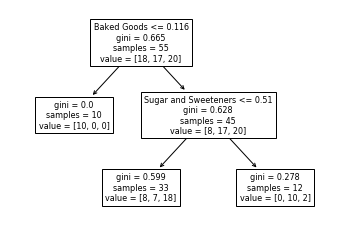

In [18]:
ax = sklearn.tree.plot_tree(decisionTree,
                       feature_names = feature_names
                      )
plt.show()

Training a single decision tree with a without specifying the maximum depth

In [19]:
decisionTree_full = sklearn.tree.DecisionTreeClassifier(max_features=None)
decisionTree_full.fit(features_train,labels_categorical_train)

DecisionTreeClassifier()

Plotting the tree

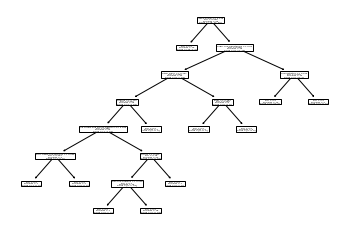

In [20]:
ax = sklearn.tree.plot_tree(decisionTree_full,
                       feature_names = feature_names
                      )
plt.savefig('tree.pdf') #saving the tree plot as pdf
plt.show()

### Ensemble of Trees

Training a random forest classifier with 100 trees

In [21]:
classifier = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=15)

In [22]:
classifier.fit(features_train,labels_categorical_train)

RandomForestClassifier(random_state=15)

Predicting the labels from the test features subset

In [23]:
predictions = classifier.predict(features_test)

Printing the confusion matrix between the true and predicted values

In [24]:
print(sklearn.metrics.confusion_matrix(predictions, labels_categorical_test))

[[8 3 0]
 [0 3 3]
 [0 2 5]]


Extracting some performance metrics from the prediction

In [25]:
print(sklearn.metrics.classification_report(predictions, labels_categorical_test))

              precision    recall  f1-score   support

           1       1.00      0.73      0.84        11
           2       0.38      0.50      0.43         6
           3       0.62      0.71      0.67         7

    accuracy                           0.67        24
   macro avg       0.67      0.65      0.65        24
weighted avg       0.73      0.67      0.69        24



Returning the probability of being classified as each class along with their true label

In [26]:
predictions_probabilities = classifier.predict_proba(features_test)
predictions_probabilities = pd.DataFrame(predictions_probabilities)
predictions_probabilities_labels = pd.concat([predictions_probabilities,pd.DataFrame(list(labels_categorical_test))], axis=1)
predictions_probabilities_labels.columns = ['class_1_probability','class_2_probability','class_3_probability','true_class']
predictions_probabilities_labels

,class_1_probability,class_2_probability,class_3_probability,true_class
0,0.20,0.42,0.38,2
1,0.88,0.08,0.04,1
2,0.36,0.33,0.31,1
3,0.51,0.27,0.22,2
4,0.37,0.17,0.46,2
5,0.43,0.25,0.32,1
6,0.37,0.29,0.34,2
7,0.13,0.29,0.58,2
8,0.83,0.08,0.09,1
9,0.12,0.52,0.36,3


Extracting the variable importance list from the random forest classifier

In [27]:
vil = pd.DataFrame(list(zip(feature_names,classifier.feature_importances_)),
                   columns=['feature','mean_gini_decrease']
                  ).sort_values(by='mean_gini_decrease', ascending=False)

In [28]:
vil.head()

,feature,mean_gini_decrease
7,Cheese,0.063591
1,Baked Goods,0.043548
42,Sugar and Sweeteners,0.042914
40,Starchy Roots,0.039150
17,Fish and Seafood,0.038324


Plotting the variable importance list sorted by the mean decrease gini

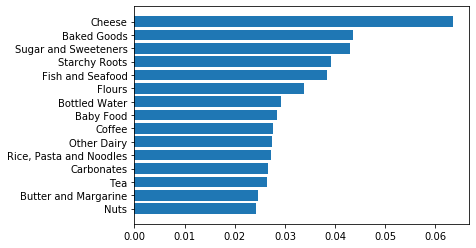

In [29]:
ax = plt.barh(data = vil.sort_values(by='mean_gini_decrease').tail(15), 
         y='feature', 
         width = 'mean_gini_decrease'
        )
plt.show()

Averaging the VIL from 50 random forest runs

In [30]:
rf_vil  = []
for i in range(50):
    rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100)
    rf = rf.fit(features_train,labels_categorical_train)
    rf_vil.append(rf.feature_importances_)
mean_vil = np.mean(rf_vil, axis = 0)

In [31]:
mean_vil = pd.DataFrame(list(zip(feature_names,mean_vil)),
                   columns=['feature','mean_gini_decrease']
                  ).sort_values(by='mean_gini_decrease', ascending=False)

In [32]:
mean_vil.head()

,feature,mean_gini_decrease
7,Cheese,0.052949
42,Sugar and Sweeteners,0.046484
1,Baked Goods,0.043457
17,Fish and Seafood,0.037730
40,Starchy Roots,0.036252


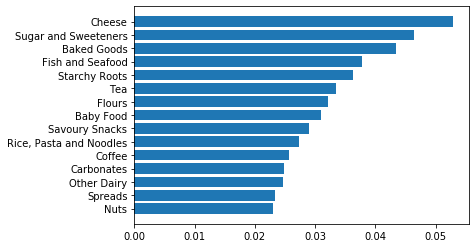

In [33]:
ax = plt.barh(data = mean_vil.sort_values(by='mean_gini_decrease').tail(15), 
         y='feature', 
         width = 'mean_gini_decrease'
        )
plt.show()

### Comparison Between Diferent Machine Learning Models and Hyperparameters

Selecting some machine learning training algorithms, training each one and using cross validation to retrieve their performance

In [34]:
models = []

models.append(("LogisticRegression",sklearn.linear_model.LogisticRegression()))
models.append(("SVC",sklearn.svm.SVC()))
models.append(("RandomForest",sklearn.ensemble.RandomForestClassifier()))
models.append(("KNeighbors",sklearn.neighbors.KNeighborsClassifier()))
models.append(("MLPClassifier",sklearn.neural_network.MLPClassifier()))
models.append(("XGBoost",xgb.XGBClassifier()))
models.append(("DecisionTree",sklearn.tree.DecisionTreeClassifier()))


results = []
names = []
for name,model in models:
    result = sklearn.model_selection.cross_val_score(model, 
                             features, 
                             labels_categorical,  
                             cv=10, 
                             scoring='accuracy',
                             n_jobs=-1
                            )
    names.append(name)
    results.append(result)

List of compared models along with their hyperparameters

In [35]:
models

[('LogisticRegression', LogisticRegression()),
 ('SVC', SVC()),
 ('RandomForest', RandomForestClassifier()),
 ('KNeighbors', KNeighborsClassifier()),
 ('MLPClassifier', MLPClassifier()),
 ('XGBoost',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                random_state=None, reg_alpha=None, reg_lambda=None,
                scale_pos_weight=None, subsample=None, tree_method=None,
                validate_parameters=None, verbosity=None)),
 ('DecisionTree', DecisionTreeClassifier())]

Box plot of the results of each model

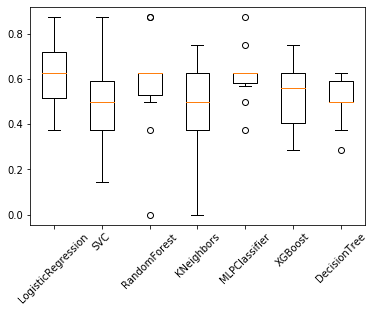

In [36]:
plt.boxplot(results,labels = names)
plt.xticks(rotation=45)
plt.show()

In [37]:
##########

#compare the models based on their f1-score, what is the problem?

##########

Grid search for selection of the best hyperparameters

In [38]:
# HIGH PROCESSOR INTENSIVE TASK (~5 minutes calculations of a 12 cores machine)

# parameters = {'n_estimators': list(range(260,360,20)),
#               'max_features': ['auto', 'sqrt'],
#               'max_depth': list(range(20,100,20))+[None],
#               'min_samples_split': [2, 5, 10],
#               'min_samples_leaf': [1, 2, 4],
#               'bootstrap': [True, False]
# }
# grid_Search = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestClassifier(), 
#                                                    parameters, 
#                                                    n_jobs=-1,
#                                                    cv = 3
#                                                   )

# grid_Search.fit(features_train,labels_categorical_train)

In [39]:
#low intensive grid search
parameters = {'n_estimators': [100,150,200]
}
grid_Search = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestClassifier(), 
                                                   parameters, 
                                                   n_jobs=-1,
                                                   cv = 3
                                                  )

grid_Search.fit(features_train,labels_categorical_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200]})

In [40]:
grid_Search.best_params_

{'n_estimators': 100}

In [41]:
pd.DataFrame(grid_Search.cv_results_).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.150749,0.003705,0.010306,0.001244,100,{'n_estimators': 100},0.578947,0.722222,0.611111,0.637427,0.061380,1
1,0.222168,0.004655,0.012233,0.000449,150,{'n_estimators': 150},0.578947,0.777778,0.555556,0.637427,0.099701,1
2,0.271580,0.011731,0.012622,0.001242,200,{'n_estimators': 200},0.578947,0.666667,0.555556,0.600390,0.047828,3


One can apply predict to gridSearch and automatically calculates the given model with the best hyper-parameters. 

In [42]:
predictions = grid_Search.predict(features_test)

In [43]:
print(sklearn.metrics.confusion_matrix(predictions, labels_categorical_test))

[[8 2 0]
 [0 4 3]
 [0 2 5]]


In [44]:
print(sklearn.metrics.classification_report(predictions, labels_categorical_test))

              precision    recall  f1-score   support

           1       1.00      0.80      0.89        10
           2       0.50      0.57      0.53         7
           3       0.62      0.71      0.67         7

    accuracy                           0.71        24
   macro avg       0.71      0.70      0.70        24
weighted avg       0.74      0.71      0.72        24



In [45]:
##########

#make your own grid search for other training algorithm

##########